In [1]:
from duckduckgo_search import DDGS  # Image search using DuckDuckGo
from fastcore.all import *  # Utilities for the fastai library
from fastdownload import download_url  # Downloading utility
from fastai.vision.all import *  # Fastai vision utilities
from PIL import Image  # Python Imaging Library for opening and handling images
from time import sleep  # Sleep for pausing between image downloads

In [2]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    ddgs = DDGS()  # Initialize DuckDuckGo search object
    results = ddgs.images(term, max_results=max_images)  # Search for images
    return L(results).itemgot('image')  # Extract image URLs from results

In [3]:
urls = search_images('puppy photos', max_images=5)  # Search for puppy photos
dest = 'puppy.jpg'  # Destination filename
download_url(urls[3], dest, show_progress=False)  # Download the 4th image

Searching for 'puppy photos'


Path('puppy.jpg')

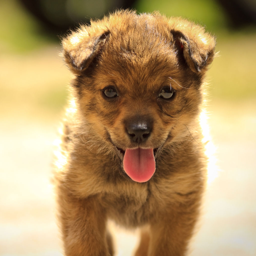

In [4]:
im = Image.open(dest)  # Open the downloaded image
im.to_thumb(256, 256)  # Display a thumbnail of size 256x256

Searching for 'kitten photos'


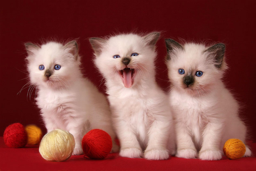

In [5]:
download_url(search_images('kitten photos', max_images=5)[3], 'kitten.jpg', show_progress=False)  # Download a kitten image
Image.open('kitten.jpg').to_thumb(256, 256)  # Display a thumbnail

In [6]:
searches = 'kitten', 'puppy'  # Define the search terms
path = Path('kitten_or_puppy')  # Define the base path for image storage

# Download images for both "kitten" and "puppy"
for o in searches:
    dest = (path/o)  # Create a subdirectory for each class
    dest.mkdir(exist_ok=True, parents=True)  # Make directories if they don't exist

    # Download images using different search terms
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause to avoid server overload
    download_images(dest, urls=search_images(f'{o} cute photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} clipart photo'))
    sleep(10)
    
    # Resize images to a maximum size of 400 pixels
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'kitten photo'
Searching for 'kitten cute photo'
Searching for 'kitten clipart photo'


/opt/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'puppy photo'
Searching for 'puppy cute photo'
Searching for 'puppy clipart photo'


/opt/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
failed = verify_images(get_image_files(path))  # Verify images
failed.map(Path.unlink)  # Remove failed images
print(f"Number of failed images removed: {len(failed)}")  # Display count

Number of failed images removed: 4


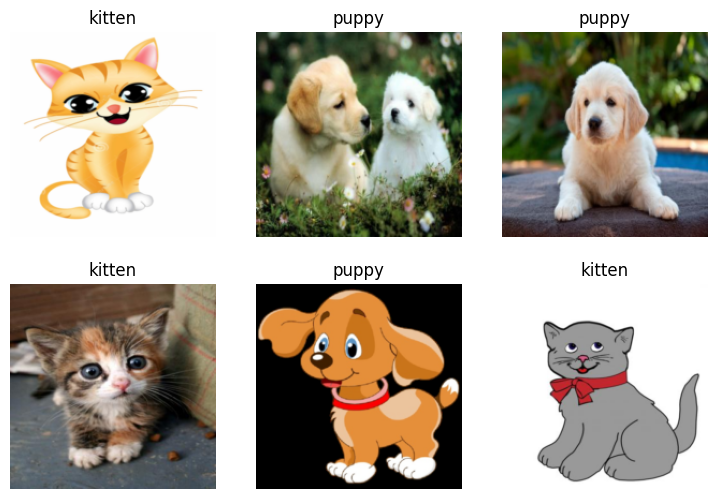

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define the types of input and output
    get_items=get_image_files,  # Get all image files in the path
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split data into training and validation sets
    get_y=parent_label,  # Use parent directory name as the label
    item_tfms=[Resize(192, method='squish')]  # Resize images to 192x192 pixels
).dataloaders(path, bs=32)  # Create data loaders with batch size of 32

dls.show_batch(max_n=6)  # Display a batch of 6 images from the data loader

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)  # Create a learner with ResNet18
learn.fine_tune(10)  # Fine-tune for 10 epochs

epoch,train_loss,valid_loss,error_rate,time
0,1.104540,1.493723,0.400000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.352562,0.851477,0.300000,00:01
1,0.330712,0.547062,0.266667,00:01
2,0.239219,0.427222,0.166667,00:01
3,0.176658,0.325316,0.100000,00:01
4,0.147148,0.313266,0.100000,00:01
5,0.124590,0.292651,0.066667,00:01
6,0.104173,0.272702,0.066667,00:01
7,0.088377,0.261402,0.066667,00:01
8,0.076176,0.264569,0.066667,00:01
9,0.067756,0.272182,0.066667,00:01


In [17]:
is_puppy, _, probs = learn.predict(PILImage.create('puppy.jpg'))  # Predict on a sample image
print(f"This is a: {is_puppy}.")  # Display the predicted label
print(f"Probability it's a puppy: {probs[0]:.4f}")  # Display the probability (kitten)
print(f"Probability it's a puppy: {probs[1]:.4f}")  # Display the probability (puppy)

This is a: puppy.
Probability it's a puppy: 0.0007
Probability it's a puppy: 0.9993
